In [11]:
from TransformingCity import TransformingCity, LandUseViewer, PopulationViewer

import numpy as np
import matplotlib.pyplot as plt
import thinkplot

%matplotlib inline
from matplotlib import rc
rc('animation', html='html5')

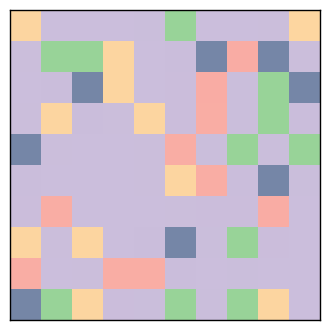

In [12]:
city = TransformingCity(10)
city.array = city.landuse # default array is landuse
viewer = LandUseViewer(city)
anim = viewer.animate()

In [13]:
anim

In [14]:
print(city.array)

[[2 1 1 1 1 6 1 1 1 2]
 [1 6 6 2 1 1 5 3 5 1]
 [1 1 5 2 1 1 3 1 6 5]
 [1 2 1 1 2 1 3 1 6 1]
 [5 1 1 1 1 3 1 6 1 6]
 [1 1 1 1 1 2 3 1 5 1]
 [1 3 1 1 1 1 1 1 3 1]
 [2 1 2 1 1 5 1 6 1 1]
 [3 1 1 3 3 1 1 1 1 1]
 [5 6 2 1 1 6 1 6 2 1]]


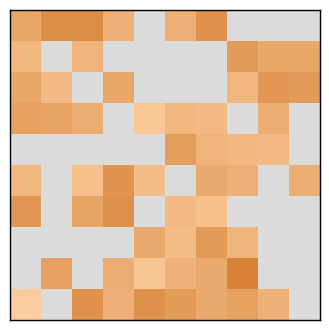

In [15]:
city = TransformingCity(10)
city.step()
city.array = city.pop_count # default array is landuse
viewer = PopulationViewer(city)
anim = viewer.animate()

In [16]:
anim

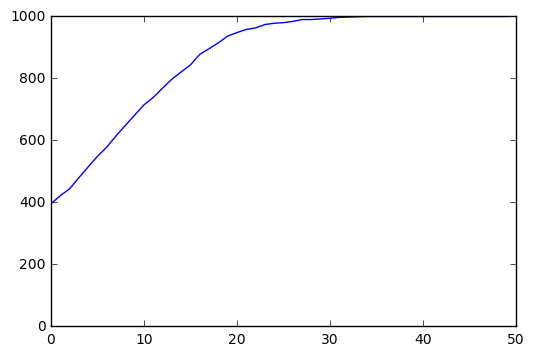

In [17]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
for i in range(50):
    city.step()
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000])
plt.show()

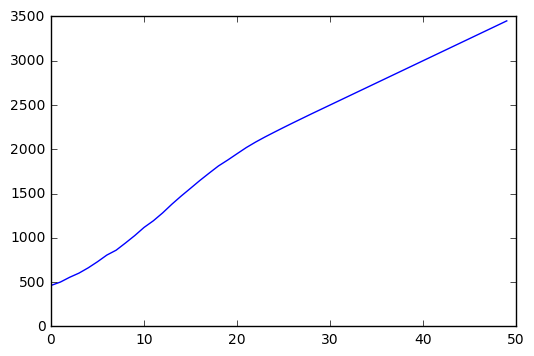

In [18]:
#A smaller city with new agents moving in means that...
#more agents get displaced, because creative density gets EVEN higher.
city = TransformingCity(7)
steps = 50
n_to_add_per_step = 50
for i in range(steps):
    city.step()
    city.add_agents(n_to_add_per_step)
    
plt.plot(city.displaced_history)
plt.ylim([0, 1000 + steps*n_to_add_per_step])
plt.show()

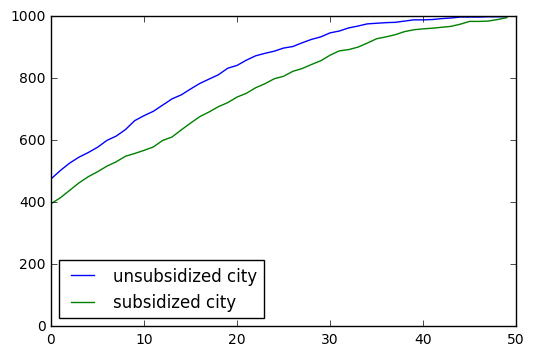

In [19]:
#The smaller the city, the more agents get displaced, because creative density is higher.
#the whole time.
city = TransformingCity(7)
sub_city = TransformingCity(7, p_subsidized = .1)


for i in range(50):
    city.step()
    sub_city.step()
    
plt.plot(city.displaced_history, label='unsubsidized city')
plt.plot(sub_city.displaced_history, label='subsidized city')
plt.legend(loc='best')
plt.ylim([0, 1000])
plt.show()